
# Train YOLOv8 Classification on Your Custom Dataset


## Steps

In this noteboook, we are going to cover:

- Before you start
- Install YOLOv8
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model
- Export Model
- Download Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Runtime` -> `Change Runtime Type`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Wed Apr 30 23:27:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8
There are two ways to install YOLOv8
- From the source (for development)
- Via pip (recommended)

In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.122 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/112.6 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Preparing a custom dataset

To prepare the custom data for classification using YOLO v8, Ensure that your dataset is structured as described below: You should have separate folders for train, test, and val, each containing subfolders for each class (e.g., ClassA, ClassB). Place the corresponding images for each class within their respective subfolders.

### Dataset Structure
```
Dataset
│
└───train
│   └───ClassA
│       │   ClassA_1.jpg
│       │   ClassA_2.jpg
│       │   ...
│   └───ClassB
│       │   ClassB_1.jpg
│       │   ClassB_2.jpg
│       │   ...
│   └───...
└───test
│   └───ClassA
│       │   ClassA_9090.jpg
│       │   ClassA_9895.jpg
│       │   ...
│   └───ClassB
│       │   ClassB_2343.jpg
│       │   ClassB_2312.jpg
│       │   ...
│   └───...
└───val
│   └───ClassA
│       │   ClassA_3070.jpg
│       │   ClassA_2845.jpg
│       │   ...
│   └───ClassB
│       │   ClassB_2903.jpg
│       │   ClassB_2232.jpg
│       │   ...
│   └───...
```


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oMxnFNuMfwUb84PsiI4Y")
project = rf.workspace("fauzan-majhj").project("skin-cancer-pchbn")
version = project.version(1)
dataset = version.download("folder")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Skin-Cancer-1 in folder:: 100%|██████████| 4046/4046 [00:00<00:00, 4576.35it/s]


In [ ]:
#!mkdir '{HOME}/datasets'
#!ls
#DATA_DIR='/content/datasets'

datasets  Skin-Cancer-1


### Download the Characters Dataset
The dataset includes 9945 images. The characters are structure in the format as described above.

In [ ]:
#!gdown 1MOy04R3IWGdiIIadLQJTxPPkdNkQKAKW -O dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1MOy04R3IWGdiIIadLQJTxPPkdNkQKAKW
To: /content/dataset.zip
100% 10.1M/10.1M [00:00<00:00, 15.8MB/s]


You may use this notebook with your own dataset as well. To use this example with your own dataset, place your zip data file into the`/content` (HOME Directory of the Notebook) directory.

In [ ]:
#!unzip "dataset.zip" -d "datasets"

Streaming output truncated to the last 5000 lines.
  inflating: datasets/train/V/56387_png.rf.093a514fe2ea25b014e2973bd5155fbf.jpg  
  inflating: datasets/train/V/56495_png.rf.55cde26bff3fc1dfbad4ebe5346dcc18.jpg  
  inflating: datasets/train/V/56639_png.rf.87857d79a96db8c0d59738ff17ddac83.jpg  
  inflating: datasets/train/V/56747_png.rf.21e8f269fc45813d475df8c9bdb2aabc.jpg  
  inflating: datasets/train/V/57215_png.rf.063b9b7a9bc9a316ab889c56b09c0415.jpg  
  inflating: datasets/train/V/57863_png.rf.6869d352aff61c9881b60953270e21b0.jpg  
  inflating: datasets/train/V/57899_png.rf.1f8090dd774529a615678c18f81dec06.jpg  
  inflating: datasets/train/V/57971_png.rf.0ae07c075333068716f32789340bc5c3.jpg  
  inflating: datasets/train/V/58259_png.rf.27f68f00056a807a13180e0ea3d9126a.jpg  
  inflating: datasets/train/V/58511_png.rf.c7984d7c65c3c2c171ff99fcebacd158.jpg  
  inflating: datasets/train/V/58547_png.rf.8639888a352f64db409bd0ba41f17459.jpg  
  inflating: datasets/train/V/58691_png.rf.55eb

## Custom Training

In [ ]:
DATA_DIR='/content/Skin-Cancer-1'
#%cd {HOME}

!yolo task=classify mode=train model=yolov8m-cls.pt data='{DATA_DIR}' epochs=30 imgsz=128

Ultralytics 8.3.122 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content/Skin-Cancer-1, epochs=30, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wid

## Validate Custom Model

In [ ]:
#%cd {HOME}
DATA_DIR='/content/Skin-Cancer-1'
#!pwd
!yolo task=classify mode=val model=/content/runs/classify/train/weights/best.pt data='/content/Skin-Cancer-1'

Ultralytics 8.3.122 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,774,185 parameters, 0 gradients, 41.6 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/Skin-Cancer-1/train... found 3568 images in 9 classes ✅ 
val: /content/Skin-Cancer-1/test... found 221 images in 9 classes ✅ 
test: /content/Skin-Cancer-1/test... found 221 images in 9 classes ✅ 
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1228.8±292.5 MB/s, size: 29.0 KB)
val: Scanning /content/Skin-Cancer-1/test... 221 images, 0 corrupt: 100% 221/221 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100% 14/14 [00:01<00:00,  7.15it/s]
                   all      0.692      0.991
Speed: 0.0ms preprocess, 1.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val
💡 Learn more at https://docs.ultralytics.com/modes/val


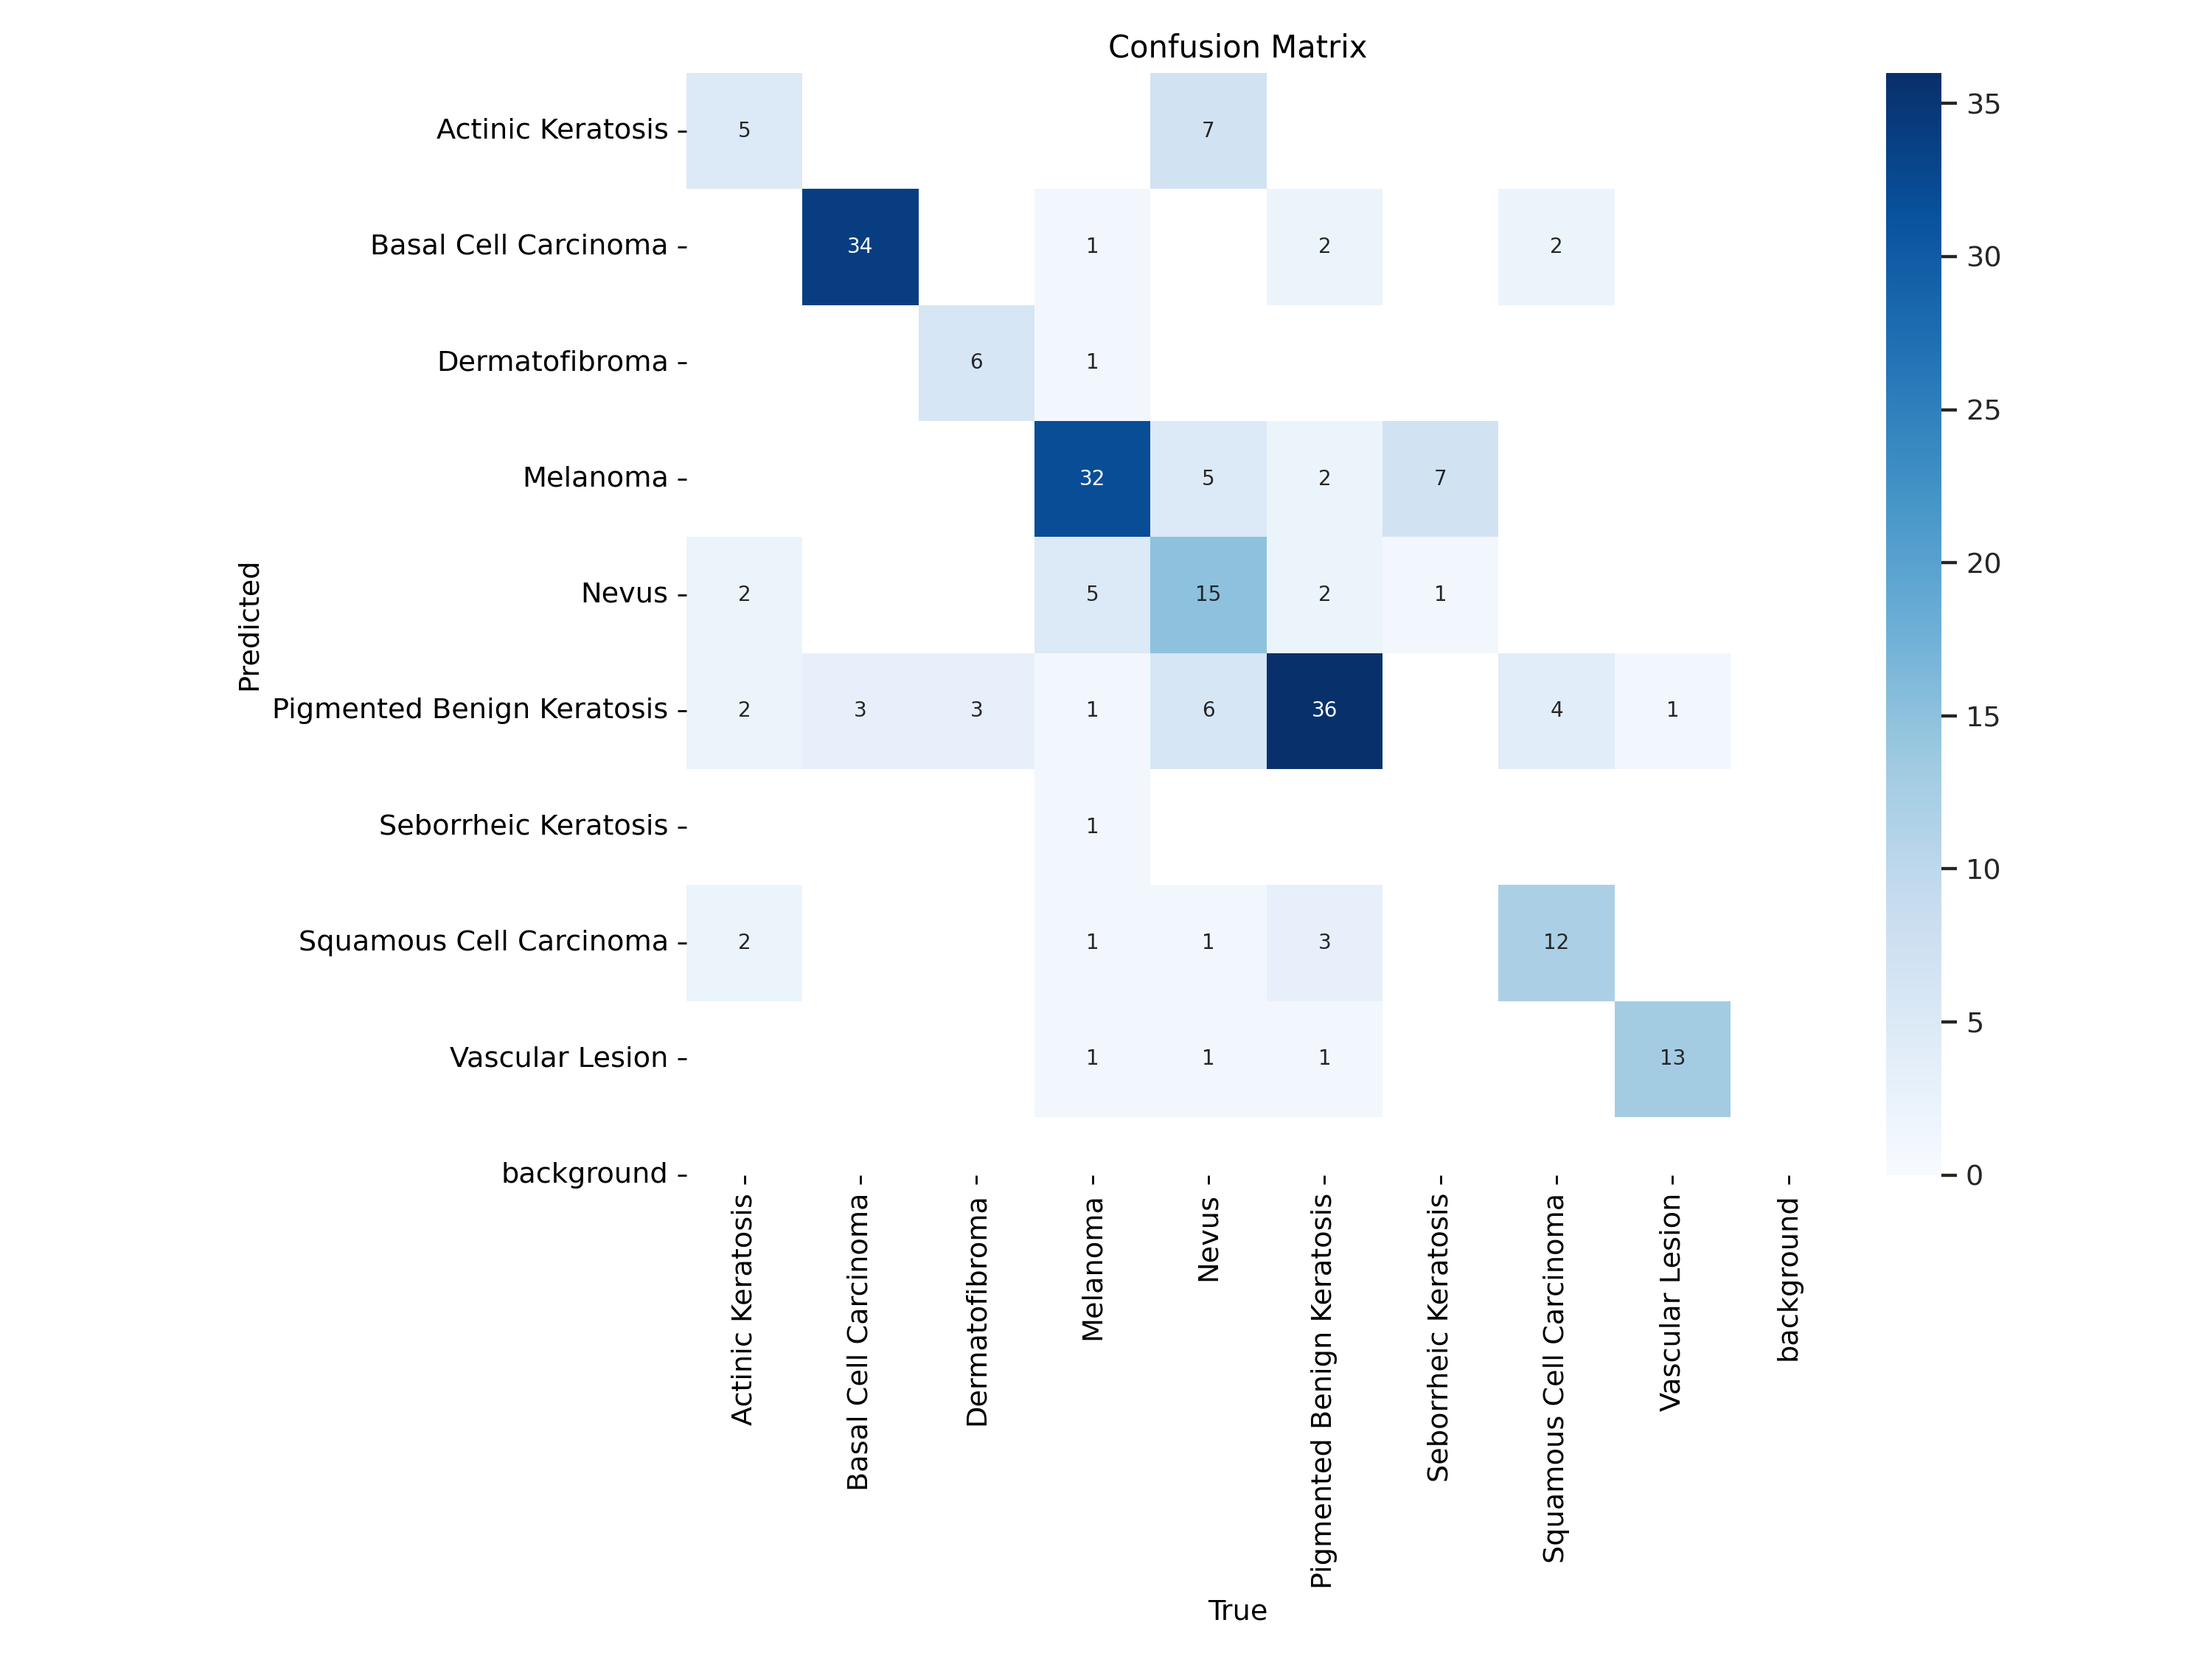

In [ ]:
Image(filename=f'/content/runs/classify/val/confusion_matrix.png')

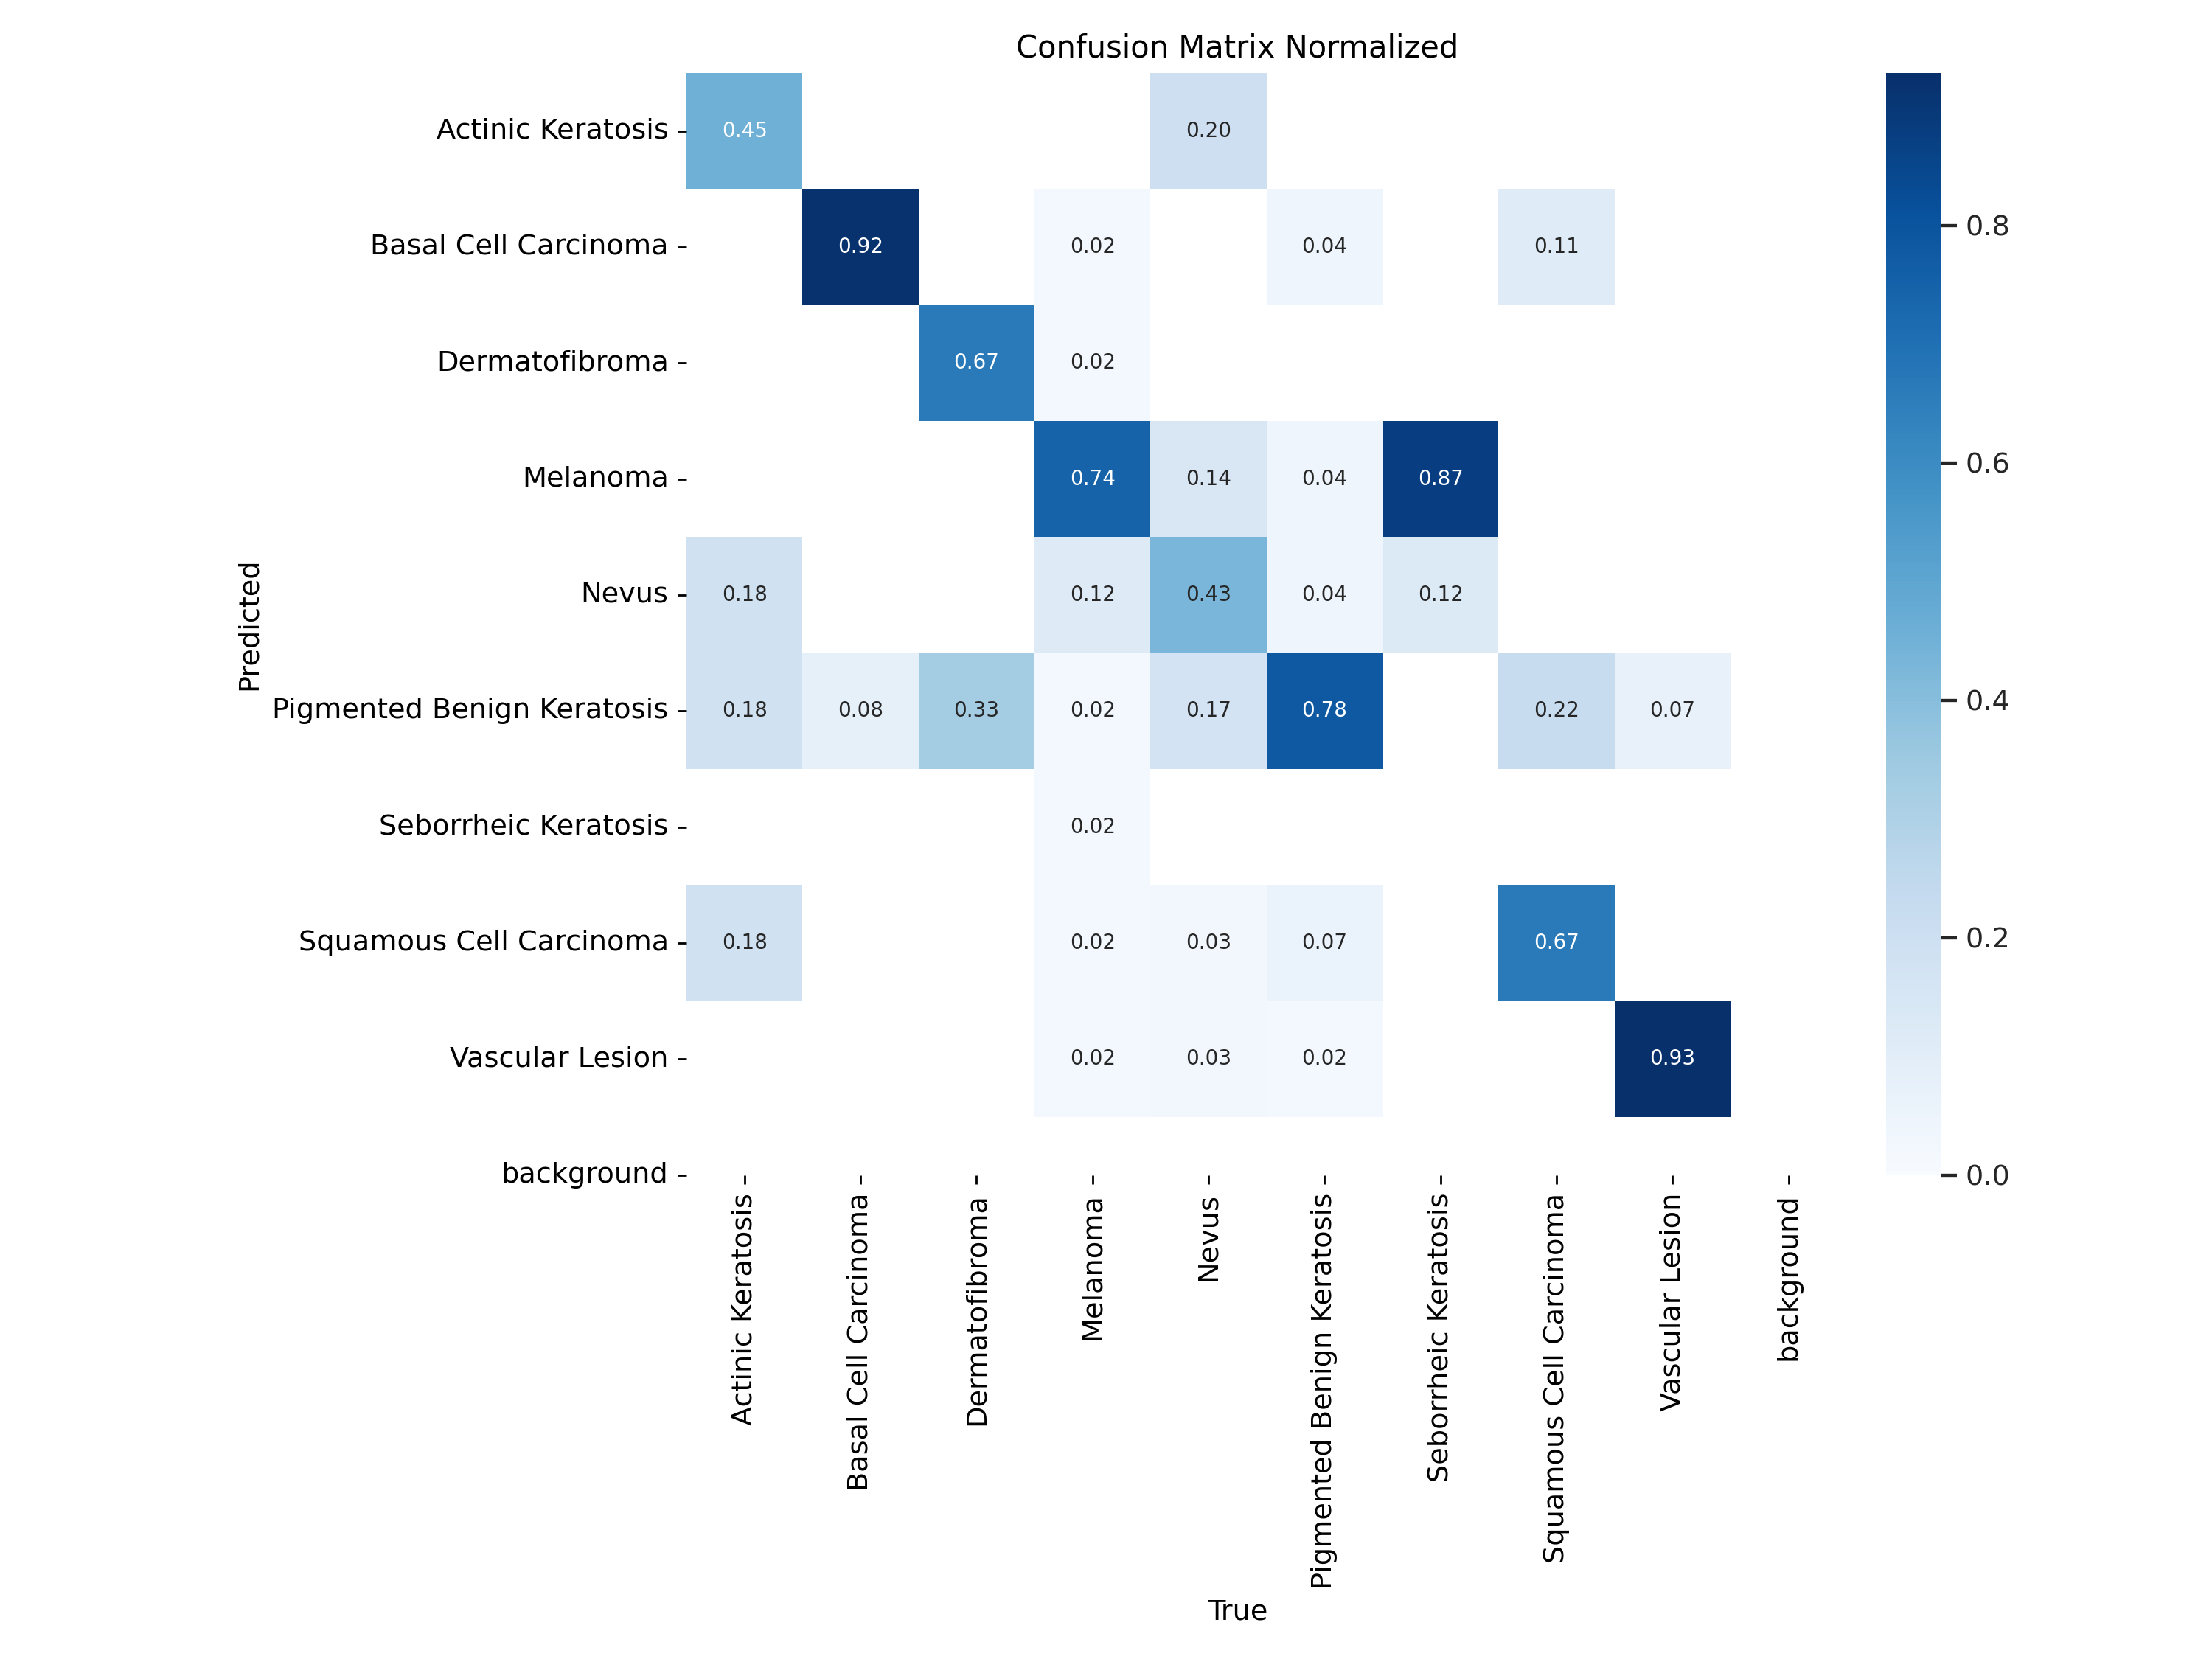

In [ ]:
Image(filename=f'/content/runs/classify/val/confusion_matrix_normalized.png')

## Inference with Custom Model

In [ ]:
%cd {HOME}

!yolo task=classify mode=predict model={HOME}/runs/classify/train/weights/best.pt conf=0.25 source="{DATA_DIR}/test/Actinic Keratosis"

/content
Ultralytics 8.3.122 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,774,185 parameters, 0 gradients, 41.6 GFLOPs

image 1/11 /content/Skin-Cancer-1/test/Actinic Keratosis/ISIC_0026040_jpg.rf.d1bbfaf586d73b58c6fd80b8bea5d667.jpg: 128x128 Actinic Keratosis 0.60, Nevus 0.27, Pigmented Benign Keratosis 0.11, Squamous Cell Carcinoma 0.01, Melanoma 0.01, 7.2ms
image 2/11 /content/Skin-Cancer-1/test/Actinic Keratosis/ISIC_0026525_jpg.rf.9266f51ad8627379f166655160e9b1a0.jpg: 128x128 Actinic Keratosis 0.74, Nevus 0.23, Squamous Cell Carcinoma 0.01, Melanoma 0.01, Pigmented Benign Keratosis 0.01, 5.7ms
image 3/11 /content/Skin-Cancer-1/test/Actinic Keratosis/ISIC_0027254_jpg.rf.0f5184575ef10556db3f9a163aa9c163.jpg: 128x128 Nevus 0.57, Pigmented Benign Keratosis 0.35, Actinic Keratosis 0.06, Squamous Cell Carcinoma 0.01, Seborrheic Keratosis 0.01, 5.6ms
image 4/11 /content/Skin-Cancer-1/test/Actinic Keratosis/ISIC_0027668_jpg.rf.e

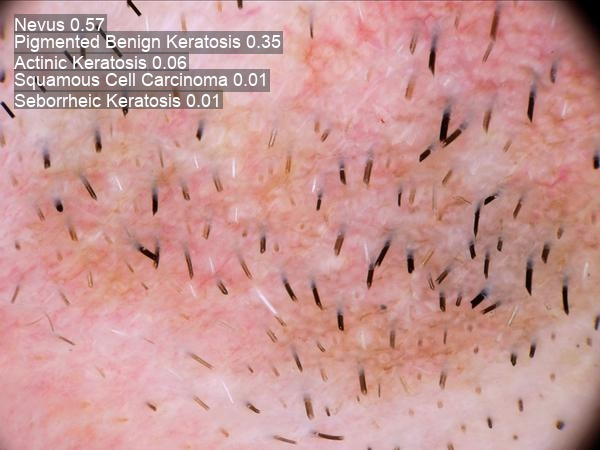

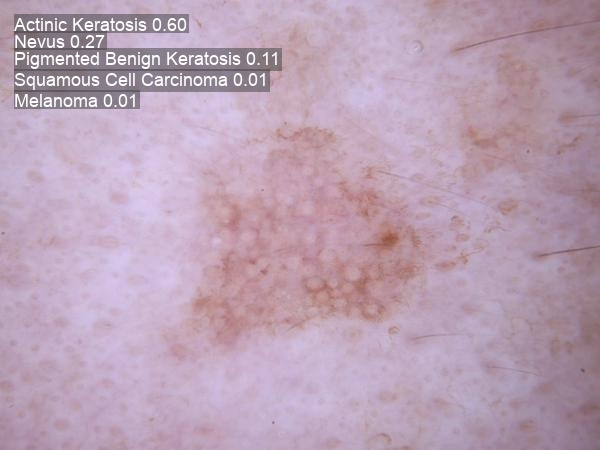

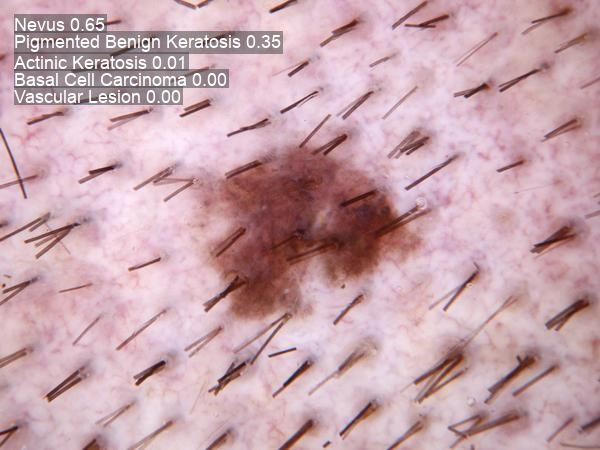

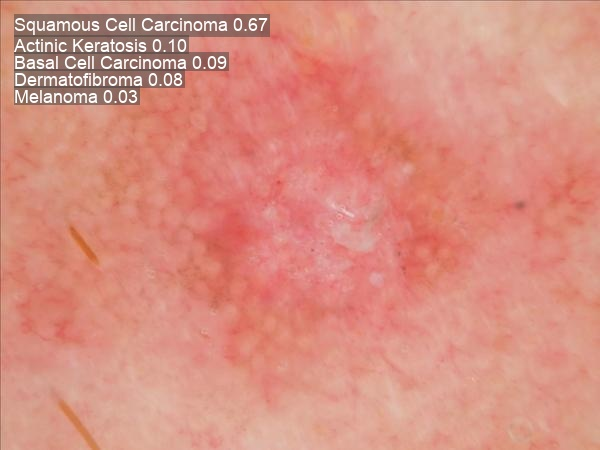

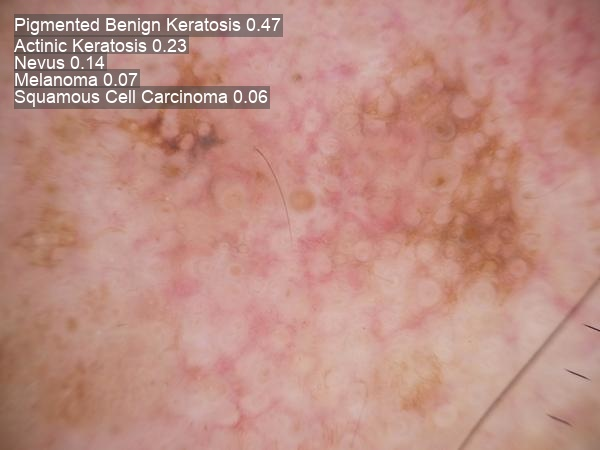

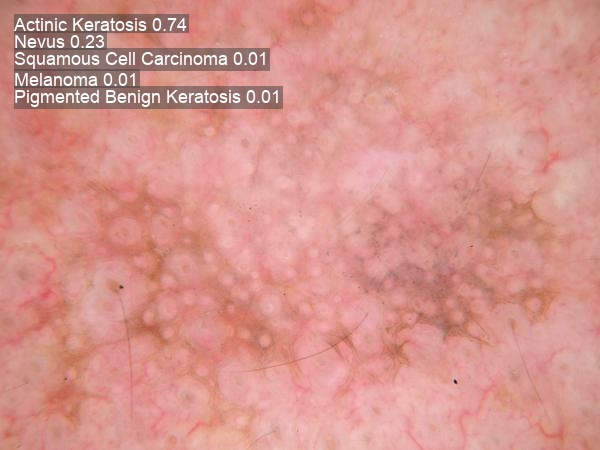

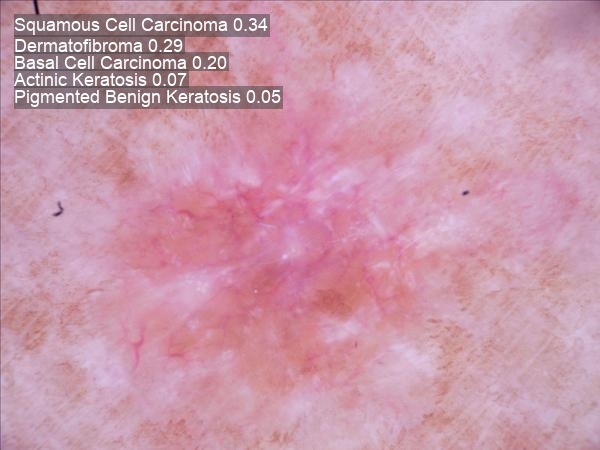

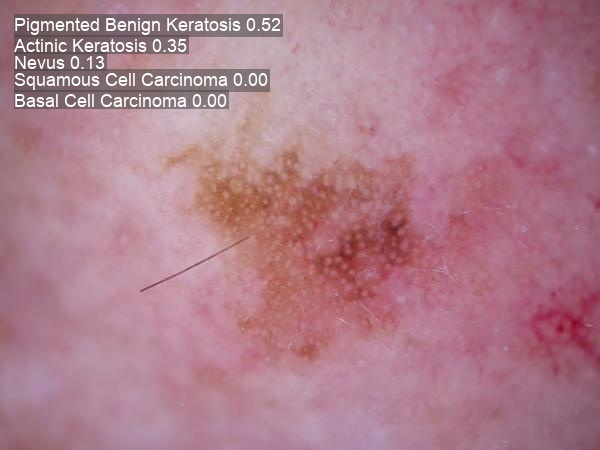

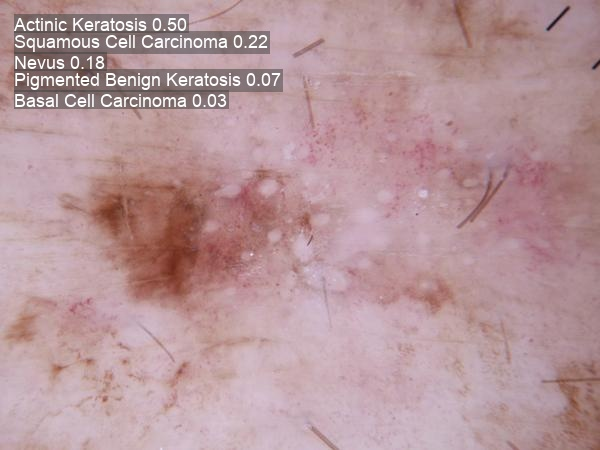

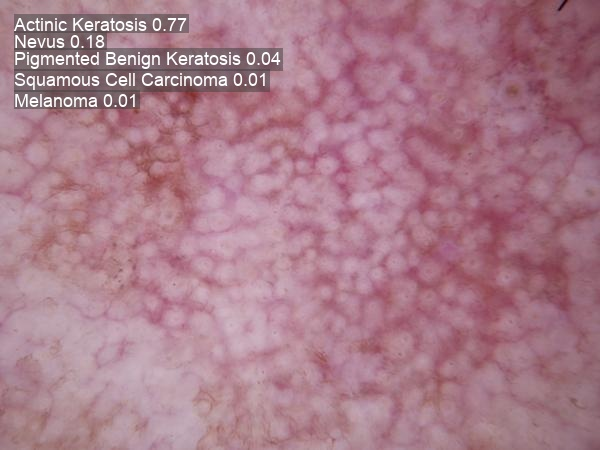

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/classify/predict/*.jpg')[:10]:
      display(Image(filename=image_path, height=600))
      print("\n")

## Export Model

Export a YOLOv8 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLOv8 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://onnx.ai/) or [OpenVINO](https://docs.openvino.ai/latest/index.html) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://developer.nvidia.com/tensorrt) for up to 5x GPU speedup.


| Format                                                                     | `format=`          | Model                     |
|----------------------------------------------------------------------------|--------------------|---------------------------|
| [PyTorch](https://pytorch.org/)                                            | -                  | `yolov8n.pt`              |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)                    | `torchscript`      | `yolov8n.torchscript`     |
| [ONNX](https://onnx.ai/)                                                   | `onnx`             | `yolov8n.onnx`            |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)                     | `openvino`         | `yolov8n_openvino_model/` |
| [TensorRT](https://developer.nvidia.com/tensorrt)                          | `engine`           | `yolov8n.engine`          |
| [CoreML](https://github.com/apple/coremltools)                             | `coreml`           | `yolov8n.mlmodel`         |
| [TensorFlow SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`      | `yolov8n_saved_model/`    |
| [TensorFlow GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`               | `yolov8n.pb`              |
| [TensorFlow Lite](https://www.tensorflow.org/lite)                         | `tflite`           | `yolov8n.tflite`          |
| [TensorFlow Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`          | `yolov8n_edgetpu.tflite`  |
| [TensorFlow.js](https://www.tensorflow.org/js)                             | `tfjs`             | `yolov8n_web_model/`      |
| [PaddlePaddle](https://github.com/PaddlePaddle)                            | `paddle`           | `yolov8n_paddle_model/`   |



In [ ]:
#!yolo export model={HOME}/runs/classify/train2/weights/best.pt format=onnx

Ultralytics 8.3.122 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
YOLOv8m-cls summary (fused): 42 layers, 15,774,185 parameters, 0 gradients, 41.6 GFLOPs

PyTorch: starting from '/content/runs/classify/train2/weights/best.pt' with input shape (1, 3, 128, 128) BCHW and output shape(s) (1, 9) (30.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.46', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 266.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 370.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 333.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 220.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 295.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 6.6s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim>=0.1.46', 'onnxruntime']
WARNING ⚠️ requirements: Restart runtime

### Download Model

In [ ]:
from google.colab import files
files.download('/content/runs/classify/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>